In [ ]:
!pip install gdown
!pip install nltk
!pip install transformers
!pip install transformers datasets
!pip install transformers datasets accelerate -U



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 36.9 MB/s eta 

In [ ]:
import gdown

# Replace 'FILE_ID' with your file ID and 'output.csv' with the desired output file name
gdown.download('https://drive.google.com/uc?id=1dhFItsdD4mTsq26Ano45I-mKfv4u6SV7', 'output.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1dhFItsdD4mTsq26Ano45I-mKfv4u6SV7
To: /content/output.csv
100%|██████████| 97.5M/97.5M [00:02<00:00, 35.4MB/s]


'output.csv'

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('output.csv')

# Display the DataFrame
print(df.head)
df.describe()


<bound method NDFrame.head of                                                      text  label
0       ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...      1
1       أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...      1
2       هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...      1
3       خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...      1
4       ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...      1
...                                                   ...    ...
164769  وهلأ لوين؟ ....سؤال اتمنى أن أطرحه في مصر اعتق...      1
164770  قراصنة الكاريبي بحس أنثوي ثلاثي الأبعاد بعد غي...      1
164771  قصة بسيطة ودراما واقعية إسلوب إخراجي يتسم بالح...      0
164772  بزوغ الفجر بتتويج دموي هكذا طل علينا فيلم ملحم...      1
164773  غزل البنات وأجمل معاني الحب عفوية وبساطة أجدها...      1

[164774 rows x 2 columns]>


,label
count,164774.000000
mean,0.213547
std,0.822813
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


# data processing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.125, random_state = 0)
# x_trains, x_test, y_trains, y_test = train_test_split(x_test, y_test, test_size = 0.2, random_state = 0)


In [ ]:
x_train

49196     كتاب خفيف جدا ، تقريبا خلصته في ساعة أثناء أنق...
33111     رواية راااااءعة، الكثير من التفاصيل الدقيقة و ...
138319     كتابات ساخره بعضها واقعى للغايه حتى انك لتفكر...
26521     من روآئع إحسان عبد القدوس. عبرة وجمآل. أنصح ال...
20495                     رائع. . دخول خدمه الغرف وانت نايم
                                ...                        
136775     كتيّب يحمل مجموعة صغيرة من مقالات الدكتور غاز...
143526                                                    ق
120701     رواية رائعة ، تفاصيلها مدهشة و ممتعة و صادقة ...
81748     مما لاشك فيه أن محمد يملك قدرة هائلة في وصف عش...
64706     الأبطال جعلوني أكره الرواية ضعف.. زيف.. كذب.. ...
Name: text, Length: 115341, dtype: object

In [ ]:
from transformers import Trainer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import TrainingArguments
import pandas as pd

# Load the tokenizer and model
model_name = 'CAMeL-Lab/bert-base-arabic-camelbert-mix-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)


In [ ]:
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        item = {key: val.squeeze() for key, val in encoding.items()}
        item['labels'] = torch.tensor(label, dtype=torch.long)
        return item

# Map labels to the range [0, num_labels-1]
label_mapping = {0: 0, 1: 1, -1: 2}
y_train = y_train.map(label_mapping).tolist()
y_val = y_val.map(label_mapping).tolist()
y_test = y_test.map(label_mapping).tolist()

train_dataset = SentimentDataset(x_train.tolist(), y_train, tokenizer)
val_dataset = SentimentDataset(x_val.tolist(), y_val, tokenizer)
test_dataset = SentimentDataset(x_test.tolist(), y_test, tokenizer)


# fine tuning

In [ ]:
import torch
import numpy as np
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, predictions)
    return {'accuracy': acc}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',         # Directory to save the final model
    num_train_epochs=2,             # Number of training epochs
    per_device_train_batch_size=20, # Batch size for training
    per_device_eval_batch_size=20,  # Batch size for evaluation
    warmup_steps=500,               # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,              # Strength of weight decay
    logging_dir='./logs',           # Directory to save logs
    logging_steps=10,               # Log every 10 steps
    eval_strategy="epoch",          # Evaluate the model at the end of each epoch
    save_strategy="epoch",          # Save checkpoint at the end of each epoch
    save_total_limit=1,             # Limit the total number of checkpoints saved. Only the last 1 will be kept.
    load_best_model_at_end=True,    # Load the best model when finished training (according to the validation loss)
    metric_for_best_model="accuracy" # Specify the evaluation metric to use for comparing checkpoints
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,  # Optionally, you can add a validation dataset
    compute_metrics=compute_metrics  # Add the custom metrics function
)

# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.615000,0.632088,0.735951
2,0.541200,0.631048,0.743780


TrainOutput(global_step=11536, training_loss=0.578442472173999, metrics={'train_runtime': 5153.2187, 'train_samples_per_second': 44.765, 'train_steps_per_second': 2.239, 'total_flos': 1.5173882357082624e+16, 'train_loss': 0.578442472173999, 'epoch': 2.0})

In [ ]:
# Predict on test data
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
accuracy = (predicted_labels == y_test).mean()
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7451069640418753


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(report)

# Compute accuracy
accuracy = (predicted_labels == y_test).mean()
print("Test Accuracy:", accuracy)

Confusion Matrix:
[[ 5136  2707  1334]
 [ 1801 13222   366]
 [ 1532   660  6197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      9177
           1       0.80      0.86      0.83     15389
           2       0.78      0.74      0.76      8389

    accuracy                           0.75     32955
   macro avg       0.73      0.72      0.72     32955
weighted avg       0.74      0.75      0.74     32955

Test Accuracy: 0.7451069640418753


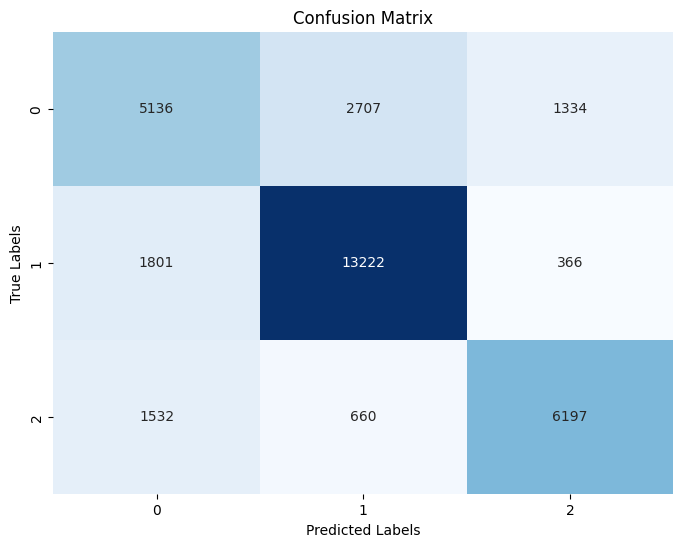

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the trained model
model.save_pretrained("./trained_model_all_data")


In [ ]:
import pickle

# Save the model as a pickle file
with open('trained_model_all_data.pkl', 'wb') as f:
    pickle.dump(model, f)
